In [ ]:
# !pip install googletrans

In [1]:
from textblob import TextBlob
import pandas as pd

In [34]:
from textblob import TextBlob

def getSubjectivity(review) :
    return TextBlob(review).sentiment.subjectivity

def getPolarity(review) :
    return TextBlob(review).sentiment.polarity

def analyze(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [36]:
df = pd.read_csv('translated_processed_data_g20.csv')
df.head()

final_data = pd.DataFrame(df[['date', 'username', 'tweet_en']])
final_data.head()

,date,username,tweet_en
0,2022-10-05 12:21:14,jeslintuse2,East Nusa Tenggara Government Ensures that all...
1,2022-10-05 12:17:55,usharanimuni,The government makes sure the hotel in Bali is...
2,2022-10-05 12:13:03,diaharmayanti1,The government makes sure the hotel in Bali is...
3,2022-10-05 12:12:31,SeptianiMestika,Bali Compendium will be brought by Indonesia t...
4,2022-10-05 12:11:59,diaharmayanti1,Indonesian telecommunications network readines...


In [39]:
final_data[ 'Subjectivity'] = final_data['tweet_en'].apply(getSubjectivity)
final_data['Polarity'] = final_data['tweet_en'].apply(getPolarity)
final_data['TextBlob'] = final_data['Polarity'].apply(analyze)
final_data.head()

final_data.to_csv('sentiment_analysis_data_g20.csv', index=False)

In [40]:
tb_counts = final_data.TextBlob.value_counts()
tb_counts

Positive    513
Neutral     494
Negative     59
Name: TextBlob, dtype: int64

In [42]:
j=1
sortedDF = final_data.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
    if( sortedDF['TextBlob'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDF['tweet_en'][i])
        print()
        j = j + 1

1) East Nusa Tenggara Government Ensures that all hotels in Bali are ready to welcome the G20 G20Indonesia RecovertherrecoversTronger G20Indonesia2022 GroupoftwentyIndonesia

2) The government makes sure the hotel in Bali is ready to welcome the Bangka Belitung G20Indonesia RecovertherrecoversTronger G20Indonesia2022 GroupoftwentyIndonesia Islands Summit

3) The government makes sure the hotel in Bali is ready to welcome the G20 G20Indonesia RecovertherrecoversTronger G20Indonesia2022 GroupoftwentyIndonesia

4) GOOD GOVERNMENT Ensures that all hotels in Bali are ready to welcome the delegation of the G20 SMiling Face Open Hands Smiling Face Open Hands Monaco Monaco Monaco Bangka Belitung G20Indonesia Recovertherrecoverstonger G2022 GroupoftwentyIndonesia

5) Hotels in Bali Ready to Welcome Summit G20 G20Indonesia Recovertogetherrecoverstronger G20Indonesia2022 GroupoftwentyIndonesia West Java

6) The government through Menparekraf Sandiaga Uno ensures that hotels in Bali are ready to w

([<matplotlib.patches.Wedge at 0x1d53bd1c550>,
 [Text(0.0647983297446155, 1.0980897852463196, 'Positive'),
  Text(-0.25379425680880513, -1.070321669037335, 'Neutral'),
  Text(1.3296437187814942, -0.23355423589590224, 'Negative')],
 [Text(0.035344543497062994, 0.5989580646798106, '48.1%'),
  Text(-0.13843323098662094, -0.5838118194749099, '46.3%'),
  Text(0.8371830821957555, -0.14705266704556805, '5.5%')])

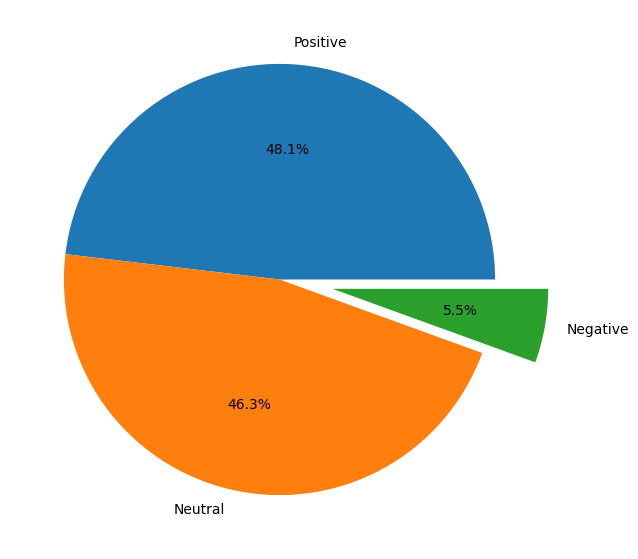

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels=tb_counts.index, explode=(0,0,0.25), autopct='%1.1f%%', shadow=False)
